# CHMC Data Reports

In [42]:
#IMPORT PACKAGES
import os
import pandas as pd
import matplotlib.dates as mdates
import datetime as DT
import time
import numpy as np
import matplotlib.pyplot as plt



In [43]:
#FUNCTION: lIST_FILES_IN_DIRECTORY
#List of all files in the directory to merge
def List_of_files_function(path_to_spreadsheets):
    list_of_files=[]
    for i in os.listdir(path_to_spreadsheets):
        list_of_files.append(path_to_spreadsheets+'/'+i)
    return list_of_files

In [44]:
#FUNCTION: JOIN_SPREADSHEETS
# Open the files one by one configure, modify them and then join them
# Make sure you do not have anything Open while lrunning this line
def Join_CMHC_Absortion(list_of_files,city):
    List_of_data_frames=[]
    for path in list_of_files:
        #Extract year from file
        try:
            file_data=pd.read_excel(open(path,'rb'),sheet_name=city, header=3,engine = 'openpyxl')
            year=file_data.columns[1]
            #open the real database
            file_data=pd.read_excel(open(path,'rb'),sheet_name=city, header=4,engine = 'openpyxl')
            #Erasing the total rows and all rows that are Nan
            file_data = file_data[file_data['Dwelling Type']!='Total']
            file_data=file_data.dropna(axis='rows')
            file_data['Year']=year
            file_data['Date'] = pd.to_datetime([f'{x[-4:]}{x[:2]}' for x in file_data['Year']])
            file_data['City']=city
            List_of_data_frames.append(file_data)
        except:
            file_data=pd.read_excel(path, sheet_name=city,header=3)
            year=file_data.columns[1]
            #open the real database
            file_data=pd.read_excel(path, sheet_name=city,header=4)
            #Erasing the total rows and all rows that are Nan
            file_data = file_data[file_data['Dwelling Type']!='Total']
            file_data=file_data.dropna(axis='rows')
            file_data['Year']=year
            file_data['Date'] = pd.to_datetime([f'{x[-4:]}{x[:2]}' for x in file_data['Year']])
            file_data['City']=city
            List_of_data_frames.append(file_data)
    # Complete Database in transactions    
    Result = pd.concat(List_of_data_frames)
    return Result


In [45]:
#ABSORBED (SALES) DATABASE CHMC 
#Data can be downloaded here https://www.cmhc-schl.gc.ca/en/professionals/housing-markets-data-and-research/housing-data/data-tables/housing-market-data
#CONFIGURATION 
path_to_spreadsheets='C:/Users/reinaldo.viccini/Desktop/Desktop Folder/Capital Markets Projects/Report Housing Starts/Absorbed_by_price_CMA'
city='Calgary'

#RUNNING THE PROCESS
list_of_files=List_of_files_function(path_to_spreadsheets)
Result=Join_CMHC_Absortion(list_of_files,city)

#FILTERING
# Looking at how many deals where done in calgary as a whole filtering all the counties
Result3=Result.copy().sort_values(by='Date')
Result3=Result3[(Result3['Census Subdivision']=='Calgary CMA: Total')]

# Create the More than Million Dollar Sales
columns_to_add=['1,000,000-1,049,999', '1,050,000-1,099,999',
       '1,100,000-1,149,999', '1,150,000-1,199,999', '1,200,000-1,249,999',
       '1,250,000-1,299,999', '1,300,000-1,349,999', '1,350,000-1,399,999',
       '1,400,000-1,449,999', '1,450,000+']

Result3['More_1M']= Result3[columns_to_add].sum(axis=1)


# Create lESS_1m VARIABLE
columns_to_add_2=['<149,999', '150,000-199,999',
       '200,000-249,999', '250,000-299,999', '300,000-349,999',
       '350,000-399,999', '400,000-449,999', '450,000-499,999',
       '500,000-549,999', '550,000-599,999', '600,000-649,999',
       '650,000-699,999', '700,000-749,999', '750,000-799,999',
       '800,000-849,999', '850,000-899,999', '900,000-949,999',
       '950,000-999,999']

Result3['Less_1M']= Result3[columns_to_add_2].sum(axis=1)

# Create percentage of Category
columns_to_add_2=['750,000-799,999',
       '800,000-849,999', '850,000-899,999', '900,000-949,999',
       '950,000-999,999']

Result3['750-1M']= Result3[columns_to_add_2].sum(axis=1)

# Create percentage of Category
columns_to_add_2=['500,000-549,999', '550,000-599,999', '600,000-649,999',
       '650,000-699,999', '700,000-749,999', '750,000-799,999']

Result3['500-750']= Result3[columns_to_add_2].sum(axis=1)

# Create percentage of Category
columns_to_add_2=['250,000-299,999', '300,000-349,999',
       '350,000-399,999', '400,000-449,999', '450,000-499,999']

Result3['250-500']= Result3[columns_to_add_2].sum(axis=1)

# Create percentage of Category
columns_to_add_2=['<149,999', '150,000-199,999',
       '200,000-249,999']

Result3['<250']= Result3[columns_to_add_2].sum(axis=1)

In [46]:
#UNABSORBED (INVENTORY) DATABASE CHMC
#CONFIGURATION 
path_to_spreadsheets='C:/Users/reinaldo.viccini/Desktop/Desktop Folder/Capital Markets Projects/Report Housing Starts/Unabsorbed_by_price_CMA'
city='Calgary'

#RUNNING THE PROCESS
list_of_files=List_of_files_function(path_to_spreadsheets)
Result=Join_CMHC_Absortion(list_of_files,city)

#FILTERING
# Looking at how many deals where done in calgary as a whole filtering all the counties
Result4=Result.copy().sort_values(by='Date')
Result4=Result4[(Result4['Census Subdivision']=='Calgary CMA: Total')]
# Create the More than Million Dollar Sales
columns_to_add=['1,000,000-1,049,999', '1,050,000-1,099,999',
       '1,100,000-1,149,999', '1,150,000-1,199,999', '1,200,000-1,249,999',
       '1,250,000-1,299,999', '1,300,000-1,349,999', '1,350,000-1,399,999',
       '1,400,000-1,449,999', '1,450,000+']

Result4['More_1M']= Result4[columns_to_add].sum(axis=1)

# Create lESS_1m VARIABLE
columns_to_add_2=['<149,999', '150,000-199,999',
       '200,000-249,999', '250,000-299,999', '300,000-349,999',
       '350,000-399,999', '400,000-449,999', '450,000-499,999',
       '500,000-549,999', '550,000-599,999', '600,000-649,999',
       '650,000-699,999', '700,000-749,999', '750,000-799,999',
       '800,000-849,999', '850,000-899,999', '900,000-949,999',
       '950,000-999,999']

Result4['Less_1M']= Result3[columns_to_add_2].sum(axis=1)


# Create percentage of Category
columns_to_add_2=['750,000-799,999',
       '800,000-849,999', '850,000-899,999', '900,000-949,999',
       '950,000-999,999']

Result4['750-1M']= Result4[columns_to_add_2].sum(axis=1)

# Create percentage of Category
columns_to_add_2=['500,000-549,999', '550,000-599,999', '600,000-649,999',
       '650,000-699,999', '700,000-749,999', '750,000-799,999']

Result4['500-750']= Result4[columns_to_add_2].sum(axis=1)

# Create percentage of Category
columns_to_add_2=['250,000-299,999', '300,000-349,999',
       '350,000-399,999', '400,000-449,999', '450,000-499,999']

Result4['250-500']= Result4[columns_to_add_2].sum(axis=1)

# Create percentage of Category
columns_to_add_2=['<149,999', '150,000-199,999',
       '200,000-249,999']

Result4['<250']= Result4[columns_to_add_2].sum(axis=1)

# Housing Market Analysis Q2 2021

## Market Overview

In [90]:
#Market Prices

CREA_Index=pd.read_excel('Seasonally Adjusted_House_Price Index_CREA.xlsx', sheet_name='CALGARY',header=0)

CREA_Index

fig, cx = plt.subplots()
xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)

#Adding Plots Together
cx.plot(dd, p4(xx), linestyle='dashed')
cx.plot(Dates,UnAbs_single_more,  c = '#C0C0C0')
cx.title.set_text('Unabsorbed (Inventory)')
cx.legend(labels=["Trend",'+1M House Inventory'],loc='upper left')
cx.yaxis.set_ticks(np.arange(50, 200, 20))
#plt.savefig('Inventory.png')
plt.show()

,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA
0,2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,225600,246200,229100,264100,167500,147000
1,2005-02-01,100.7,100.5,100.6,100.7,100.9,100.7,227100,247500,230500,265900,169000,148000
2,2005-03-01,101.3,101.1,101.4,101.2,101.6,101.2,228500,248900,232200,267200,170100,148700
3,2005-04-01,101.7,101.5,101.8,101.6,102.0,101.0,229400,250000,233200,268400,170900,148400
4,2005-05-01,102.0,101.9,102.1,102.0,102.5,101.6,230100,250900,233800,269500,171700,149400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-11-01,185.5,191.8,190.9,193.2,168.1,168.3,418500,472100,437400,510200,281500,247400
191,2020-12-01,186.8,193.3,192.5,194.5,168.8,168.5,421400,475800,441000,513700,282800,247700
192,2021-01-01,188.3,194.7,194.0,195.9,169.7,169.5,424800,479300,444400,517400,284300,249200
193,2021-02-01,191.1,198.1,196.0,199.6,170.7,171.0,431200,487600,449100,527100,286000,251400


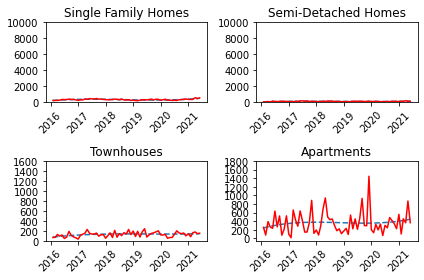

In [225]:
#WHAT IS BEING BUILT Calgary -Housing Starts
path='C:/Users/reinaldo.viccini/Desktop/Desktop Folder/Capital Markets Projects/Report Housing Starts/Housing_Starts_Calgary_CHMC/HOUSING_STARTS_CALGARY_JUNE_2021.xlsx'
CHMC_Under_Construction=pd.read_excel(open(path,'rb'), header=0,engine = 'openpyxl')

#Change date of Interest
start_date = "2016-02-01"
after_start_date = CHMC_Under_Construction['Date']>=start_date
CHMC_Under_Construction= CHMC_Under_Construction.loc[after_start_date]

#Creating Dates
CHMC_Under_Construction_dates=CHMC_Under_Construction['Date']

#Selecting Columns
Under_Construction_Single=CHMC_Under_Construction['Single']
Under_Construction_Semi=CHMC_Under_Construction['Semi-Detached']
Under_Construction_Row=CHMC_Under_Construction['Row']
Under_Construction_Apartment=CHMC_Under_Construction['Apartment']

#############Creating Line single
plt.subplot(2,2,1) # row 1, col 2 index 1

# Trend line
x = mdates.date2num(CHMC_Under_Construction_dates)
z4 = np.polyfit(x, Under_Construction_Single, 3)
p4 = np.poly1d(z4)

xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)
plt.plot(dd, p4(xx), linestyle='dashed')
plt.plot(CHMC_Under_Construction_dates,Under_Construction_Single,c = '#FF0000')
plt.title("Single Family Homes")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 11000,2000))

#############Creating Semi
plt.subplot(2, 2, 2)
# Trend line
x = mdates.date2num(CHMC_Under_Construction_dates)
z4 = np.polyfit(x, Under_Construction_Semi, 3)
p4 = np.poly1d(z4)

xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)
plt.plot(dd, p4(xx), linestyle='dashed')
plt.plot(CHMC_Under_Construction_dates,Under_Construction_Semi,c = '#FF0000')
plt.title("Semi-Detached Homes")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 11000,2000))


#############Creating Townhouses
plt.subplot(2, 2, 3)
# Trend line
x = mdates.date2num(CHMC_Under_Construction_dates)
z4 = np.polyfit(x, Under_Construction_Row, 3)
p4 = np.poly1d(z4)

xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)
plt.plot(dd, p4(xx), linestyle='dashed')
plt.plot(CHMC_Under_Construction_dates,Under_Construction_Row,c = '#FF0000')
plt.title("Townhouses")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1800,200))

################### Apartments
plt.subplot(2, 2, 4)
x = mdates.date2num(CHMC_Under_Construction_dates)
z4 = np.polyfit(x, Under_Construction_Apartment, 3)
p4 = np.poly1d(z4)

xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)
plt.plot(dd, p4(xx), linestyle='dashed')
plt.plot(CHMC_Under_Construction_dates,Under_Construction_Apartment,c = '#FF0000')
plt.title("Apartments")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 2000,200))

#Display
plt.tight_layout()
plt.show()


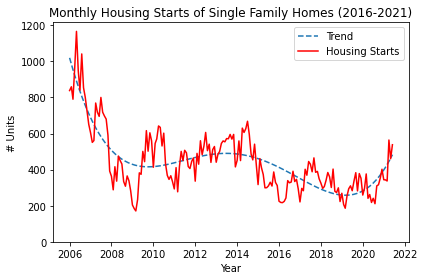

In [231]:
#Single Graphs Housing Starts for Single Family Homes
path='C:/Users/reinaldo.viccini/Desktop/Desktop Folder/Capital Markets Projects/Report Housing Starts/Housing_Starts_Calgary_CHMC/HOUSING_STARTS_CALGARY_JUNE_2021.xlsx'
CHMC_Under_Construction=pd.read_excel(open(path,'rb'), header=0,engine = 'openpyxl')

#Change date of Interest
start_date = "2006-01-01"
after_start_date = CHMC_Under_Construction['Date']>=start_date
CHMC_Under_Construction= CHMC_Under_Construction.loc[after_start_date]

#Creating Dates
CHMC_Under_Construction_dates=CHMC_Under_Construction['Date']

#Selecting Columns
Under_Construction_Single=CHMC_Under_Construction['Single']
Long_term_average=[Under_Construction_Single.sum()/len(Under_Construction_Single)]*len(Under_Construction_Single)
#############Creating Line single
plt.subplot(1,1,1) # row 1, col 2 index 1

# Trend line
x = mdates.date2num(CHMC_Under_Construction_dates)
z4 = np.polyfit(x, Under_Construction_Single, 4)
p4 = np.poly1d(z4)

xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)

plt.plot(dd, p4(xx), linestyle='dashed')
plt.plot(CHMC_Under_Construction_dates,Under_Construction_Single,c = '#FF0000')
#plt.plot(CHMC_Under_Construction_dates,Long_term_average)
plt.title("Monthly Housing Starts of Single Family Homes (2016-2021)")
plt.yticks(np.arange(0,1400,200))
plt.xlabel('Year')
plt.ylabel('# Units')
#plt.legend(labels=["Trend",'Housing Starts','5-year Avg'],loc='upper right')
plt.legend(labels=["Trend",'Housing Starts'],loc='upper right')
#plt.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#cx.yaxis.set_label_text('# Units')
#cx.xaxis.set_label_text('Year')
#cx.title.set_text('Monthly Housing Starts of Single Family Homes (2006-2021)')
#cx.legend(labels=["Trend",'+1M House Sales','5-year Avg'],loc='upper left')


#Display
plt.tight_layout()
plt.show()


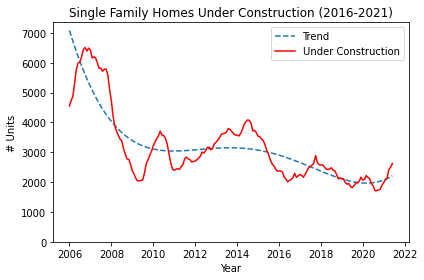

In [242]:
#Single Graphs Housing Starts Under Construction Single Family Homes
path='C:/Users/reinaldo.viccini/Desktop/Desktop Folder/Capital Markets Projects/Report Housing Starts/Housing_Starts_Calgary_CHMC/UnderConstruction_Starts_CHMC_Calgary_June_2021.xlsx'
CHMC_Under_Construction=pd.read_excel(open(path,'rb'), header=0,engine = 'openpyxl')

#Change date of Interest
start_date = "2006-01-01"
after_start_date = CHMC_Under_Construction['Date']>=start_date
CHMC_Under_Construction= CHMC_Under_Construction.loc[after_start_date]

#Creating Dates
CHMC_Under_Construction_dates=CHMC_Under_Construction['Date']

#Selecting Columns
Under_Construction_Single=CHMC_Under_Construction['Single']
Long_term_average=[Under_Construction_Single.sum()/len(Under_Construction_Single)]*len(Under_Construction_Single)
#############Creating Line single
plt.subplot(1,1,1) # row 1, col 2 index 1

# Trend line
x = mdates.date2num(CHMC_Under_Construction_dates)
z4 = np.polyfit(x, Under_Construction_Single, 4)
p4 = np.poly1d(z4)

xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)

plt.plot(dd, p4(xx), linestyle='dashed')
plt.plot(CHMC_Under_Construction_dates,Under_Construction_Single,c = '#FF0000')
#plt.plot(CHMC_Under_Construction_dates,Long_term_average)
plt.title("Single Family Homes Under Construction (2016-2021)")
plt.yticks(np.arange(0,8000,1000))
plt.xlabel('Year')
plt.ylabel('# Units')
#plt.legend(labels=["Trend",'Housing Starts','5-year Avg'],loc='upper right')
plt.legend(labels=["Trend",'Under Construction'],loc='upper right')
#plt.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#cx.yaxis.set_label_text('# Units')
#cx.xaxis.set_label_text('Year')
#cx.title.set_text('Monthly Housing Starts of Single Family Homes (2006-2021)')
#cx.legend(labels=["Trend",'+1M House Sales','5-year Avg'],loc='upper left')


#Display
plt.tight_layout()
plt.show()


In [241]:
#Cummulative Housing Starts
path='C:/Users/reinaldo.viccini/Desktop/Desktop Folder/Capital Markets Projects/Report Housing Starts/Housing_Starts_Calgary_CHMC/Housing_Starts_CHMC_Calgary_June_2021.xlsx'
CHMC_Under_Construction=pd.read_excel(open(path,'rb'), header=0,engine = 'openpyxl')

#Creating Dates
CHMC_Under_Construction_dates=CHMC_Under_Construction['Date']

#CHMC_Under_Construction.groupby(['Fruit','Name']).sum()
Under_Construction_Single_Year= CHMC_Under_Construction.groupby('Date', as_index=False)['Single'].sum()
Under_Construction_Single_Year= Under_Construction_Single_Year.set_index(CHMC_Under_Construction['Date'].rename('Year').dt.year, append=True).swaplevel(0,1)
Under_Construction_Single_Year


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/reinaldo.viccini/Desktop/Desktop Folder/Capital Markets Projects/Report Housing Starts/Housing_Starts_Calgary_CHMC/Housing_Starts_CHMC_Calgary_June_2021.xlsx'

In [ ]:
#STACKBAR
import pandas as pd
import numpy as np
# Loading Data
CHMC_Under_Construction=pd.read_excel('Historical_UnderConstruction_Calgary.xlsx',header=0)

#Variables
Single=CHMC_Under_Construction.groupby(CHMC_Under_Construction['Date'].dt.year, as_index=False)['Single'].sum()['Single']
Semi=CHMC_Under_Construction.groupby(CHMC_Under_Construction['Date'].dt.year, as_index=False)['Semi-Detached'].sum()['Semi-Detached']
Row=CHMC_Under_Construction.groupby(CHMC_Under_Construction['Date'].dt.year, as_index=False)['Row'].sum()['Row']
Apartment=CHMC_Under_Construction.groupby(CHMC_Under_Construction['Date'].dt.year, as_index=False)['Apartment'].sum()['Apartment']

#Additional columns for the stackbar
Year=CHMC_Under_Construction['Date'].dt.year.unique()
Row_2=list(np.add(Single,Semi))
Apartment_2=list(np.add(Single,Semi,Row))

#Plot
plt.bar(x=Year,height=Single,width=0.7,label="Single Family Homes")
plt.bar(x=Year,height=Semi,width=0.7,bottom=Semi,label="Semi-Detached Homes")
plt.bar(x=Year,height=Row,width=0.7,bottom=Row_2,label="Townhouses")
plt.bar(x=Year,height=Apartment,width=0.7,bottom=Apartment_2,label="Apartment")

#Display
plt.tight_layout()
plt.show()

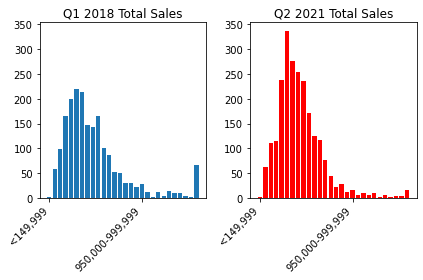

In [124]:
#Data Absorption Q2 2021
All_Properties_2021=Result3[(Result3['Year']=='Q2 2021')]
All_transactions_2021=All_Properties_2021.sum(axis = 0, skipna = True)[2:30]
labels=All_transactions_2021.index

#Data Q1 Absorption 2018
All_Properties_2018=Result3[(Result3['Year']=='Q1 2018')]
All_transactions_2018=All_Properties_2018.sum(axis = 0, skipna = True)[2:30]
labels=All_transactions_2018.index
labels_2=['<149,999','950,000-999,999']
# Figure
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2,sharey=ax1,sharex=ax1)

#Plot Q1 2018
ax1.bar(x=labels,height=All_transactions_2018)
ax1.title.set_text('Q1 2018 Total Sales')
ax1.set_xticks(labels_2)
ax1.set_xticklabels(labels_2, rotation=45, ha='right')
#ax1.xticks(rotation='vertical')
#plt.title.set_text('Absorption Q1 2018')

#Plots Q1 2021
ax2.bar(x=labels,height=All_transactions_2021,color='#FF0000')
ax2.title.set_text('Q2 2021 Total Sales')
ax2.set_xticks(labels_2)
ax2.set_xticklabels(labels_2, rotation=45, ha='right')

#plt.xticks(rotation='vertical')
#plt.title.set_text('Absorption Q1 2021')

#Display
plt.tight_layout()
plt.show()



Despite federal estimulus  Alberta's bad economic performance has made the housing market switch away from high end options towards less expensive alternatives. When we compare the the number of transactions across all market segments in Q1 2018 to Q1 2021 we can see that most transactions was shifted towards less expensive product.

>- Alberta's Economy is smaller after COVID, average incomes are lower so they are buying smaller homes.

>- First time home buyers and people upgrading from condos to single detach homes is what is driving the market

## Absorption (Sales) by Price and Category

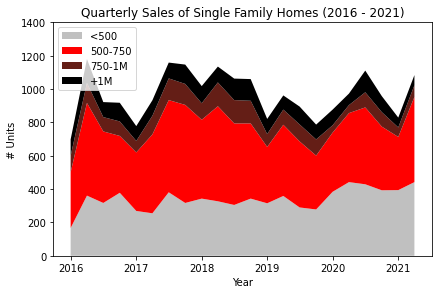

In [202]:
#ABSORBED UNITS - SINGLE FAMILY HOMES - SALES
#Posible Categories 'Absorbed - Single', 'Absorbed - Row' , 'Absorbed - Apartment and other', 'Absorbed - Semi-Detached' ,'Absorbed - Semi-Detached' 
Category='Absorbed - Single'

#Dates
Dates=Result3[(Result3['Dwelling Type']==Category)]
Dates=Dates['Date'].unique()


#Getting the Absorption
Abs_single_more=Result3[(Result3['Dwelling Type']==Category)]['More_1M']
Abs_single_750=Result3[(Result3['Dwelling Type']==Category)]['750-1M']
Abs_single_500=Result3[(Result3['Dwelling Type']==Category)]['500-750']
Abs_single_250=Result3[(Result3['Dwelling Type']==Category)]['250-500']+Result3[(Result3['Dwelling Type']==Category)]['<250']

#Plot
fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1)
ax2.stackplot(Dates,Abs_single_250,Abs_single_500,Abs_single_750,Abs_single_more ,labels=['<500','500-750','750-1M','+1M'],colors = ['#C0C0C0','#FF0000','#641E16','black'])
ax2.title.set_text('Quarterly Sales of Single Family Homes (2016 - 2021)')
ax2.legend(loc='upper left')
ax2.yaxis.set_ticks(np.arange(0, 1500, 200))

#Display
plt.tight_layout()
plt.ylabel('# Units')
plt.xlabel('Year')
plt.show()


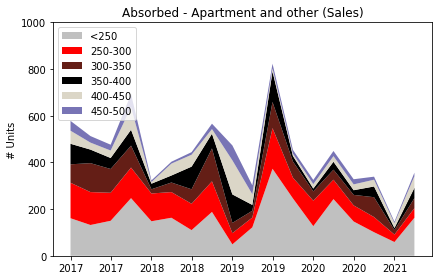

In [222]:
#ABSORBED UNITS - APARTMENTS AND OTHERS - SALES
#Posible Categories 'Absorbed - Single', 'Absorbed - Row' , 'Absorbed - Apartment and other', 'Absorbed - Semi-Detached' ,'Absorbed - Semi-Detached' 
Category='Absorbed - Apartment and other'

#Dates
Dates=Result3[(Result3['Dwelling Type']==Category)]
Dates=Dates['Date'].unique()


#Getting the Absorption
#Index(['150,000-199,999', '200,000-249,999', '250,000-299,999',
#       '300,000-349,999', '350,000-399,999', '400,000-449,999',
#       '450,000-499,999', '500,000-549,999', '550,000-599,999',
#       '600,000-649,999', '650,000-699,999', '700,000-749,999',
#       '750,000-799,999', '800,000-849,999', '850,000-899,999',
#       '900,000-949,999', '950,000-999,999', '1,000,000-1,049,999',
#       '1,050,000-1,099,999', '1,100,000-1,149,999', '1,150,000-1,199,999',
#       '1,200,000-1,249,999', '1,250,000-1,299,999', '1,300,000-1,349,999',
#       '1,350,000-1,399,999', '1,400,000-1,449,999', '1,450,000+'],
#      dtype='object')


Abs_single_more_2=Result3[(Result3['Dwelling Type']==Category)]['450,000-499,999'].astype(np.float)
Abs_single_more_1=Result3[(Result3['Dwelling Type']==Category)]['400,000-449,999'].astype(np.float)
Abs_single_more=Result3[(Result3['Dwelling Type']==Category)]['350,000-399,999'].astype(np.float)
Abs_single_750=Result3[(Result3['Dwelling Type']==Category)]['300,000-349,999'].astype(np.float)
Abs_single_500=Result3[(Result3['Dwelling Type']==Category)]['250,000-299,999'].astype(np.float)
Abs_single_250=Result3[(Result3['Dwelling Type']==Category)]['150,000-199,999'].astype(np.float)+Result3[(Result3['Dwelling Type']==Category)]['200,000-249,999'].astype(np.float)

#Plot
fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1)
ax2.stackplot(Dates,Abs_single_250,Abs_single_500,Abs_single_750,Abs_single_more,Abs_single_more_1,Abs_single_more_2 ,labels=['<250','250-300','300-350','350-400','400-450','450-500'],colors = ['#C0C0C0','#FF0000','#641E16','black','#DBD6C7','#7874B5'])
ax2.title.set_text(Category +' (Sales)')
ax2.legend(loc='upper left')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#ax2.xaxis.set_ticks(np.arange(1, 5, 1))

ax2.yaxis.set_ticks(np.arange(0, 1200, 200))

#Display
plt.tight_layout()
plt.ylabel('# Units')
plt.show()


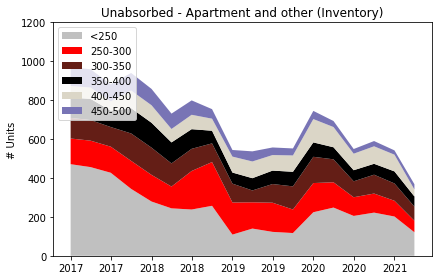

In [220]:
#ABSORBED UNITS - APARTMENTS AND OTHERS - SALES
#Posible Categories 'Absorbed - Single', 'Absorbed - Row' , 'Absorbed - Apartment and other', 'Absorbed - Semi-Detached' ,'Absorbed - Semi-Detached' 
Category='Unabsorbed - Apartment and other'

#Dates
Dates=Result4[(Result4['Dwelling Type']==Category)]
Dates=Dates['Date'].unique()


#Getting the Absorption
#Index(['150,000-199,999', '200,000-249,999', '250,000-299,999',
#       '300,000-349,999', '350,000-399,999', '400,000-449,999',
#       '450,000-499,999', '500,000-549,999', '550,000-599,999',
#       '600,000-649,999', '650,000-699,999', '700,000-749,999',
#       '750,000-799,999', '800,000-849,999', '850,000-899,999',
#       '900,000-949,999', '950,000-999,999', '1,000,000-1,049,999',
#       '1,050,000-1,099,999', '1,100,000-1,149,999', '1,150,000-1,199,999',
#       '1,200,000-1,249,999', '1,250,000-1,299,999', '1,300,000-1,349,999',
#       '1,350,000-1,399,999', '1,400,000-1,449,999', '1,450,000+'],
#      dtype='object')


Abs_single_more_2=Result4[(Result4['Dwelling Type']==Category)]['450,000-499,999'].astype(np.float)
Abs_single_more_1=Result4[(Result4['Dwelling Type']==Category)]['400,000-449,999'].astype(np.float)
Abs_single_more=Result4[(Result4['Dwelling Type']==Category)]['350,000-399,999'].astype(np.float)
Abs_single_750=Result4[(Result4['Dwelling Type']==Category)]['300,000-349,999'].astype(np.float)
Abs_single_500=Result4[(Result4['Dwelling Type']==Category)]['250,000-299,999'].astype(np.float)
Abs_single_250=Result4[(Result4['Dwelling Type']==Category)]['150,000-199,999'].astype(np.float)+Result4[(Result4['Dwelling Type']==Category)]['200,000-249,999'].astype(np.float)

#Plot
fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1)
ax2.stackplot(Dates,Abs_single_250,Abs_single_500,Abs_single_750,Abs_single_more,Abs_single_more_1,Abs_single_more_2 ,labels=['<250','250-300','300-350','350-400','400-450','450-500'],colors = ['#C0C0C0','#FF0000','#641E16','black','#DBD6C7','#7874B5'])
ax2.title.set_text(Category +' (Inventory)')
ax2.legend(loc='upper left')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#ax2.xaxis.set_ticks(np.arange(2016, 2021, 1))

ax2.yaxis.set_ticks(np.arange(0, 1400, 200))

#Display
plt.tight_layout()
plt.ylabel('# Units')
plt.show()



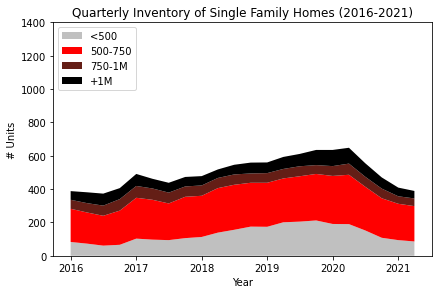

In [208]:
#UNABSORBED UNITS - Single Family Homes - INVENTORY
#Posible Categories 'Absorbed - Single', 'Absorbed - Row' , 'Absorbed - Apartment and other', 'Absorbed - Semi-Detached' ,'Absorbed - Semi-Detached' 
Category='Unabsorbed - Single'

#Dates
Dates=Result4[(Result4['Dwelling Type']==Category)]
Dates=Dates['Date'].unique()

# Data Inventory More categories
Abs_single_more=Result4[(Result4['Dwelling Type']==Category)]['More_1M']
Abs_single_750=Result4[(Result4['Dwelling Type']==Category)]['750-1M']
Abs_single_500=Result4[(Result4['Dwelling Type']==Category)]['500-750']
Abs_single_250=Result4[(Result4['Dwelling Type']==Category)]['250-500']+Result4[(Result4['Dwelling Type']=='Unabsorbed - Single')]['<250']

#Plot
fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1)
ax2.stackplot(Dates,Abs_single_250,Abs_single_500,Abs_single_750,Abs_single_more ,labels=['<500','500-750','750-1M','+1M'],colors = ['#C0C0C0','#FF0000','#641E16','black'])
ax2.title.set_text('Quarterly Inventory of Single Family Homes (2016-2021)')
ax2.legend(loc='upper left')
ax2.yaxis.set_ticks(np.arange(0, 1500, 200))

#Display
plt.tight_layout()
plt.ylabel('# Units')
plt.xlabel('Year')
plt.show()


Houses worth more than a million dollar represent a tiny sleeve of the market for single detached homes.As of YTD 2021 they represent only 8,12% of single house sales. We are currently at a historic low absorption for this type of properties which   historic average participation of 15.5% of this Market. Despite the small number of transactions we can see that invetories are also at historic lows which signals that in the upcoming quarters inventory of this type of property might be very atractive for home buyers.Houses under the million dollar mark had a good 2020 but have deaccelrated to a current 758 in Q1 after reaching 946 in the second quarter of 2020.

>- Houses worth +1M dollars are only 8.12% of all single detach home transations down from a historic 15.15% participation

>- The early 2020 spike in transactions for +1M has decreased to a historic minimum of 67 in Q1 2021

>- On the bright side inventories of +1M homes are at a historic minimum so there might opportunity in the future.


## Sales 

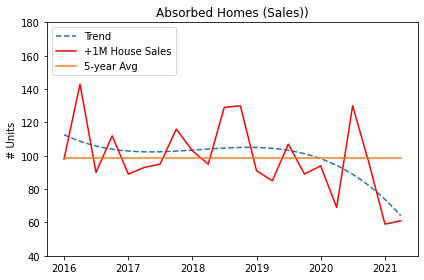

In [153]:
# Trend Line and Line Graph Sales +1M Homes
# Data Sales
Category='Absorbed - Single'

#Dates
Dates=Result3[(Result3['Dwelling Type']==Category)]
Dates=Dates['Date'].unique()

#Category
Abs_single_more=Result3[(Result3['Dwelling Type']==Category)]['More_1M']
Long_term_average=[Abs_single_more.sum()/len(Abs_single_more)]*len(Dates)


# Es importante lidear con las fechas
x = mdates.date2num(Dates)
z4 = np.polyfit(x, Abs_single_more, 3)
p4 = np.poly1d(z4)

fig, cx = plt.subplots()
xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)

#Adding Plots Together
cx.plot(dd, p4(xx), linestyle='dashed')
cx.plot(Dates,Abs_single_more,  c = '#FF0000')
cx.plot(Dates,Long_term_average)
cx.yaxis.set_ticks(np.arange(40, 200, 20))
cx.yaxis.set_label_text('# Units')
#cx.xaxis.set_label_text('Year')
cx.title.set_text('Absorbed Homes (Sales))')
cx.legend(labels=["Trend",'+1M House Sales','5-year Avg'],loc='upper left')

#plot
plt.tight_layout()
plt.show()


The were only 67 transactions for type of properties Q1 in 2021. In contrast with a 100 in Q1 2020 and 104 in Q1 2019. Last years increase was due to Bank of Canada Policies that lowered interest as a way to stimulate the economy due to COVID-19 reaching a long-term low of 0.25%. Prime rates currently stand at 2.51%.

>- Doing a Deeper dive into the +1M house market we see that sales have been trending downwards since 2016.

>- 2020 was an atypical year and we likely going to see a rebound in transactions at the end of the year as the economy recovers

## Inventory

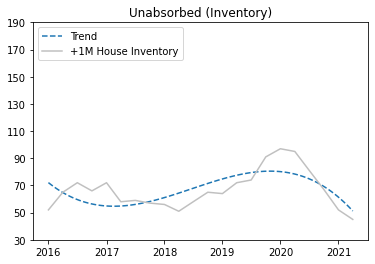

In [151]:
#Trend Line and Line Graph Inventory New +M 1Homes
# Trend Line and Line Graph Sales +1M Homes
# Data Sales
Category='Unabsorbed - Single'

#Dates
Dates=Result4[(Result4['Dwelling Type']==Category)]
Dates=Dates['Date'].unique()

#Data Inventory
UnAbs_single_more=Result4[(Result4['Dwelling Type']==Category)]['More_1M']
UnAbs_single_less=Result4[(Result4['Dwelling Type']==Category)]['Less_1M']

# Es importante lidear con las fechas
x = mdates.date2num(Dates)
z4 = np.polyfit(x, UnAbs_single_more, 3)
p4 = np.poly1d(z4)

fig, cx = plt.subplots()
xx = np.linspace(x.min(), x.max(), 100)
dd = mdates.num2date(xx)

#Adding Plots Together
cx.plot(dd, p4(xx), linestyle='dashed')
cx.plot(Dates,UnAbs_single_more,  c = '#C0C0C0')
cx.title.set_text('Unabsorbed (Inventory)')
cx.legend(labels=["Trend",'+1M House Inventory'],loc='upper left')
cx.yaxis.set_ticks(np.arange(30, 200, 20))
#plt.savefig('Inventory.png')
plt.show()


At the same time the inventory for Single 1M homes is at its lowest since Q1 2016 at only 61 new houses speaks for potential demand of for this type of properties in the near future.Calgary's economic recovery in 2021 and 2022 will determine whether this market continues to shrink.

>- Historic minimum of this type of assets is probably going to mean at lowest levels since 2016

 ## Consumer Preferences

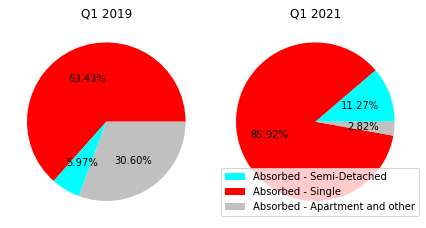

In [145]:
# Data
All_Properties_Labels=Result3[(Result3['Year']=='Q2 2021') & (Result3['Dwelling Type']!='Absorbed - Row')]['Dwelling Type']
All_Properties_2021=Result3[(Result3['Year']=='Q2 2021')& (Result3['Dwelling Type']!='Absorbed - Row')]['More_1M']
All_Properties_2019=Result3[(Result3['Year']=='Q2 2019')& (Result3['Dwelling Type']!='Absorbed - Row')]['More_1M']

#Creating Pie Charts
plt.subplot(1, 2, 1 ) # row 1, col 2 index 1
plt.pie(All_Properties_2019,autopct='%1.2f%%',colors=['#FF0000','#00FFFF','#C0C0C0'])
plt.title("Q1 2019")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie(All_Properties_2021,autopct='%1.2f%%',colors=['#00FFFF','#FF0000','#C0C0C0'])
plt.title("Q1 2021")
plt.legend(All_Properties_Labels,loc='best')
plt.tight_layout()


plt.show()


The participation +1M single dollar homes have increased their share of in the category as a whole from 83.20% in Q1 2019 to 87.01% of all sales. This is a also a positive development for type of asset. Meaning that purchasars of high-end real estate preffer this type of properties

>- Another bright spot is that single detach houses are dominating +1M market.

 ## Conclusion

>- Incomes in Alberta are lower due to COVID so despite cheap mortgages people are transtioning to cheaper housing options.

>- 1M Dollar homes have historically average 15.5 percent of all single house sales. Unfortunately in 2021 this has decreased to a historic low of 8.12 percent. Transactions over a million dollars are only

>- 1M Dollar homes are at historical low by number of transactions with only 67 sold in Q1 2021. This is a long term trend started in 2015. The short lived spike in early 2020 is now over.

>- On the bright side inventories are also at historic lows with only 61 units in Q1 2021. So although the market is smaller there might be room for future growth as the economy pick up. Also people how buy +1M homes have strong preference for single detach houses as compared to semis and apartments.



## Land Sales West of Sarcee Trail Past 5 Years

In [86]:
#Transactions West of Sarcee Trail
Land_sales=pd.read_excel('Land_Sales_More_10_Acres.xlsx',header=0)

#Neither commercer or Non-Arms
Land_sales=Land_sales[(Land_sales['Sale Type']!='Non-Arms') & (Land_sales['Usage']!='Commercial')]

#Mean
Mean_Price=sum(Land_sales['Price'])/len(Land_sales['Price'])
Mean_Price_Acre=(sum(Land_sales['Price'])/sum(Land_sales['Size (acres)']))/len(Land_sales['Price'])

# Table
Land_sales.head(16)

,Date,Adress,Minicipality,Price,Size (acres),Price/acre,Usage,Sale Type,Vendor,Purchaser
4,2016-03-24,756 101st Street S.W.,Calgary,7300000,16.00,456250.0,Long Term,Market,All Shots Golf (Curb Side Investments Inc.),GSL GM City (1945150 Alberta Ltd.)
7,2017-12-13,244141 Range Road 31,Calgary,4100000,149.19,27482.0,Agricultural,Market,Hallmark Resources Ltd.,1156514 Alberta Ltd.
9,2017-11-15,131 St. Moritz Drive S.W.,Calgary,1590000,2.78,571942.0,Institutional,Market,The Anglican Diocese of Calgary Foundation (Th...,Wells & Associates Limited
10,2018-10-29,240191 101st Street S.W.,Calgary,1500000,12.09,124069.0,Long Term,Market,An individual(s) acting in his/her own capacity,CME Holdings Ltd.
11,2016-11-18,7010 Elkton Drive S.W.,Calgary,1500000,0.55,NaN,Institutional,Market,An individual(s) acting in his/her own capacity,The Mennonite Educational Society of Alberta
14,2018-08-16,244033 Range Road 31,Calgary,800000,19.74,40527.0,Agricultural,Market,Sylvan Crest Investments Inc. (522433 Alberta ...,An individual(s) acting in his/her own capacity


In terms of land sales West of Sarcee trail we observed 15 transactions in the past 5 years.The average land deal in the area was 27.9833 CAD with an average price per acre of 13.967CAD per acre
